# Perceptron Class

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/1_qJGkvQB_okmAVeX3k68D_A.jpeg?raw=true'>

We will see how to implement the perceptron model using breast cancer data set in python.

A perceptron is a fundamental unit of the neural network which takes weighted inputs, process it and capable of performing binary classifications. This is a follow up to my previous post on the Perceptron Model.

**Disclaimer**: The content and the structure of this article is based on the deep learning lectures from One-Fourth Labs — Padhai.

### Perceptron Recap

In the perceptron model inputs can be real numbers unlike the Boolean inputs in MP Neuron Model. The output from the model will still be binary {0, 1}. The perceptron model takes the input x if the weighted sum of the inputs is greater than threshold b output will be 1 else output will be 0.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/PM1.jpg?raw=true'>
    
                    Fig 1— Mathematical RepresentationLearning Algorithm

The main goal of the learning algorithm is to find vector **w** capable of absolutely separating Positive **P** (y = 1) and Negative **N**(y = 0) sets of data. Perceptron learning algorithm goes like this,

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/PM2.jpg?raw=true'>
                        
                            (Fig 2— Perceptron Algorithm)


To understand the learning algorithm in detail and the intuition behind why the concept of updating weights works in classifying the Positive and Negative data sets perfectly, kindly refer to my previous post on the Perceptron Model.

The data set we will be using is breast cancer data set from sklearn. The data set has 569 observations and 30 variables excluding the class variable. The breast cancer data is an imbalanced data set, that means the classes ‘0’ and ‘1’ are not represented equally. In this example, we are not going to perform any sampling techniques to balance the data because this is a simple implementation of the perceptron model.

<img src='https://github.com/taruntiwarihp/raw_images/blob/master/PM3.jpg?raw=true'>

(Class Imbalance)

### ***Formula***

 $y = 1,\mbox{if}\sum_i w_i x_i >= b$

$y = 0, \mbox{otherwise}$

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
# convert the data to pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

data['class'] = breast_cancer.target

* X as set of features and y as class label
* In this case we looking for primary classification problem wheather a particular tissue is malignant and benign
    * Malignant means it has cancerous nature
    * Benign means it does't has cancer

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [8]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


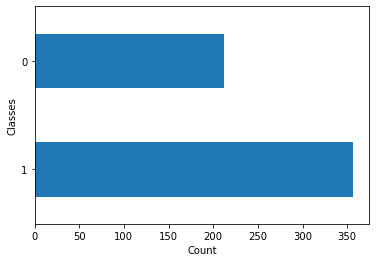

In [9]:
# plotting a graph to see c;ass imbalance

data['class'].value_counts().plot(kind = "barh") 
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [10]:
# perform scaling on the data
X = data.drop("class", axis = 1)
Y = data['class']

### Train Test Split

In [11]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

### Binarisation of Inputs

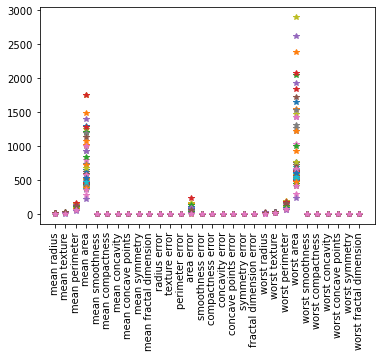

In [12]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

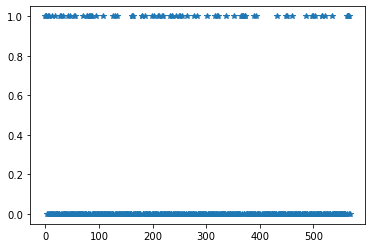

In [14]:
plt.plot(X_binarised_3_train, '*')

In [15]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

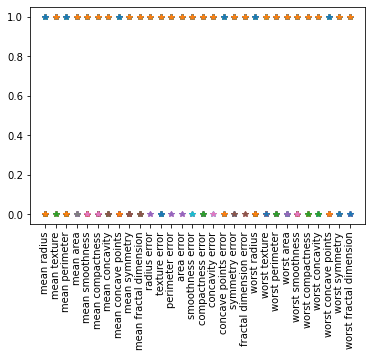

In [16]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()


In [17]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [18]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [19]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [20]:
type(X_binarised_test)

numpy.ndarray

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
X_train = X_train.values
X_test = X_test.values

(Perceptron Preprocessing)

After fetching the X and Y variables, we will perform Min-Max scaling to bring all the features in the range 0 — 1. Before building the model, we will split the data so that we can train the model on training data and test the performance of the model on testing data. We will use sklearn’s train_test_split function to split the data in the ratio of 90:10 for training and testing respectively. Now that we are done with preprocessing steps, we can start building the model. We will build our model inside a class called perceptron.

In the perceptron class, we will create a constructor function def__init__. The constructor initializes the weights vector **w** and threshold **b** to None.

### Perceptron Model class

In [23]:
class Perceptron:
# constructor 
    def __init__ (self):
        self.w = None
        self.b = None

# model
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

# predictor to predict on the data based on w 
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        
        self.w = chkptw
        self.b = chkptb
        
        print("Max Accuracy", max_accuracy)
        
        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()

(Perceptron Model)

The function model takes input values x as an argument and perform the weighted aggregation of inputs (dot product between w.x) and returns the value 1 if the aggregation is greater than the threshold b else 0. Next, we have the predict function that takes input values x as an argument and for every observation present in x, the function calculates the predicted outcome and returns a list of predictions.

Finally, we will implement fit function to learn the best possible weight vector w and threshold value b for the given data. The function takes input data(x & y), learning rate and the number of epochs as arguments.

In [24]:
perceptron = Perceptron()

Max Accuracy 0.947265625


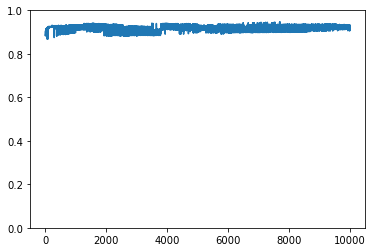

In [25]:
perceptron.fit(X_train, Y_train, 10000, 0.0001)

In [26]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


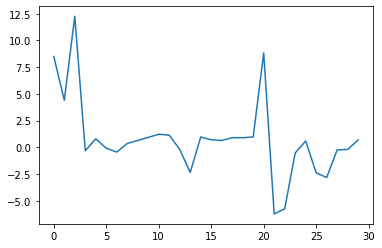

In [27]:
plt.plot(perceptron.w)
plt.show()

(Perceptron Model Execution)

Once we have our class ready, we initialize a new perceptron class object and using that object we will call fit method on our training data to learn the best possible parameters. We will evaluate the model performance on the test data by calculating the testing accuracy.